<h2><center>Group 20</center></h2>
<h3><center>Jainit Patel - 201801172</center></h3>
<h3><center>Raj Desai - 201801183</center></h3>
<h3><center>Chirag Gupta - 201801188</center></h3>
<h3><center>Meet Parmar - 201801195</center></h3>
<h3><center>Raj Bhavsar - 201801437</center></h3>

## Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# There are total 8 types of classes or emotions
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

## Loading features(MFCCs) and emotions of all audio files 

In [ ]:
import time

starting_time = time.time()
data = pd.read_csv('/content/drive/MyDrive/ML/RAVTESS_MFCC_Observed.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.5838227272033691ms
   Unnamed: 0           0          1  ...         38         39    emotion
0        2842 -520.823303  75.906799  ...  19.813313  10.987593    neutral
1        3247 -423.271484  77.593124  ...   2.209725   2.348104    disgust
2         610 -715.503662  69.203728  ...  -2.218677  -2.971524       calm
3         634 -537.216003  46.795460  ...   4.379309   3.290406        sad
4         535 -589.433960  52.526531  ...  -0.472045   0.445019  surprised

[5 rows x 42 columns]


In [ ]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'emotion'],
      dtype='object')

In [ ]:
# dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [ ]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [ ]:
# separating features(mfccs) and target emotion
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

## SVM without Scalling

Implementing SVM with Scikit-Learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Total size of dataset
X.shape, y.shape

((4240, 40), (4240,))

In [ ]:
# Gives all unique values or emotions in dataset
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)


X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. 

In [ ]:
# Dividing dataset into two parts 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print("Training set size: ", X_train.shape)
print("Testing set size: ", X_test.shape)

Training set size:  (3392, 40)
Testing set size:  (848, 40)


Now to train the data, we will use inbuilt support vector classifier algorithm from Scikit-Learn library.

In [ ]:
from sklearn.svm import SVC

Here, we are using linear and rbf(similar to gaussian) kernel

In [ ]:
svc_linear_kernel = SVC(kernel = 'linear')
svc_rbf_kernel = SVC(kernel = 'rbf')


The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method

In [ ]:
import time

starting_time = time.time()

svc_linear_kernel.fit(X_train, y_train)
svc_rbf_kernel.fit(X_train, y_train)

print("Trained model in %s ms " % str(time.time() - starting_time))


print('Accuracy without Scaling with linear kernel: {}'.format(svc_linear_kernel.score(X_test, y_test)))
print('Accuracy without Scaling with gaussian kernel: {}'.format(svc_rbf_kernel.score(X_test, y_test)))


Trained model in 68.5583975315094 ms 
Accuracy without Scaling with linear kernel: 0.7323113207547169
Accuracy without Scaling with gaussian kernel: 0.6061320754716981


To make predictions, the predict method of the SVC class is used.

In [ ]:
y_pred_linear = svc_linear_kernel.predict(X_test)
y_pred_rbf = svc_rbf_kernel.predict(X_test)

# Classification reports and Confusion Matrix
Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.
We have used the following code for finding these metrics:

### For Linear Kernel

              precision    recall  f1-score   support

       angry       0.74      0.86      0.80       124
        calm       0.42      0.66      0.52        38
     disgust       0.68      0.69      0.68        99
        fear       0.77      0.80      0.79       119
       happy       0.69      0.64      0.67       115
     neutral       0.82      0.74      0.77        91
         sad       0.79      0.76      0.77       127
   surprised       0.81      0.66      0.73       135

    accuracy                           0.73       848
   macro avg       0.71      0.73      0.71       848
weighted avg       0.74      0.73      0.73       848

----accuracy score 73.23113207547169 ----


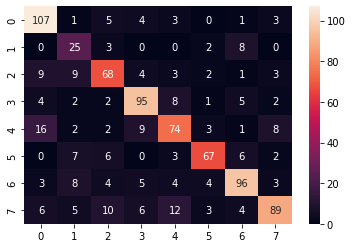

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

# classification report
print(classification_report(y_test,y_pred_linear))

# Accuracy  of model
acc = float(accuracy_score(y_test,y_pred_linear))*100
print("----accuracy score %s ----" % acc)

# confusion matrix
cm = confusion_matrix(y_test,y_pred_linear)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

### For Gaussian Kernel

              precision    recall  f1-score   support

       angry       0.64      0.81      0.71       124
        calm       0.29      0.76      0.42        38
     disgust       0.34      0.75      0.46        99
        fear       0.95      0.66      0.78       119
       happy       0.81      0.18      0.30       115
     neutral       1.00      0.75      0.86        91
         sad       0.73      0.72      0.73       127
   surprised       0.73      0.39      0.50       135

    accuracy                           0.61       848
   macro avg       0.69      0.63      0.60       848
weighted avg       0.72      0.61      0.61       848

----accuracy score 60.613207547169814 ----


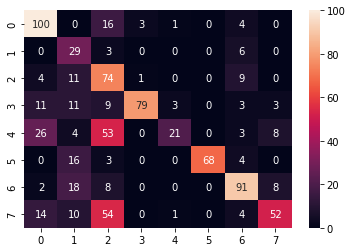

In [ ]:

# classification report
print(classification_report(y_test,y_pred_rbf))

# Accuracy  of model
acc = float(accuracy_score(y_test,y_pred_rbf))*100
print("----accuracy score %s ----" % acc)

# confusion matrix
cm = confusion_matrix(y_test,y_pred_rbf)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

Now by calculating the training accuracy and comparing with testing accuracy, we can check for overfitting of data

In [ ]:
print("<----------Linear Kernel------------>")
train_acc = float(svc_linear_kernel.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_linear_kernel.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

print("<-----------Gaussian Kernel------------>")

train_acc = float(svc_linear_kernel.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_rbf_kernel.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)


<----------Linear Kernel------------>
----train accuracy score 82.54716981132076 ----
----test accuracy score 73.23113207547169 ----
<-----------Gaussian Kernel------------>
----train accuracy score 82.54716981132076 ----
----test accuracy score 60.613207547169814 ----


# SVM with Scaling 

When performing the linear SVM classification, it is often helpful to normalize the training data. 

## Explanation

The Gaussian kernel in SVM measures the distances between a pair of examples. If features take a different range of values, euclidean distance will be dominated by the features that have a huge range of values and consequently, will ignore other features whose range of values are small. Thus, feature scaling has to be performed before using the Gaussian kernel.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


# Setup the pipeline steps: steps
steps_liner_kernel = [('scaler', StandardScaler()),
        ('SVM', SVC(kernel = 'linear'))]
        
steps_gaussian_kernel = [('scaler', StandardScaler()),
        ('SVM', SVC(kernel = 'rbf'))]
        
# Create the pipeline to perform steps
pipeline_linear = Pipeline(steps_liner_kernel)
pipeline_rbf = Pipeline(steps_gaussian_kernel)

# Fit the pipeline to the training set

svc_scaled_linear_kernel = pipeline_linear.fit(X_train, y_train)

svc_scaled_rbf_kernel = pipeline_rbf.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling with linear kernel: {}'.format(svc_scaled_linear_kernel.score(X_test, y_test)))
print('Accuracy with Scaling with gaussian kernel: {}'.format(svc_scaled_rbf_kernel.score(X_test, y_test)))


Accuracy with Scaling with linear kernel: 0.7405660377358491
Accuracy with Scaling with gaussian kernel: 0.8172169811320755


As SVC gaussian kernel permorming better compared to linear kernel, we will generate report and confusion matrix of SVC with gaussian kernel

In [ ]:
svc_scaled = svc_scaled_linear_kernel

Checking for overfitting or underfitting by comparing the training and testing scores of the model

In [ ]:
print("<----------Linear Kernel ----------->")
train_acc = float(svc_scaled_linear_kernel.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled_linear_kernel.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

print("<----------Gaussian Kernel ----------->")
train_acc = float(svc_scaled_rbf_kernel.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled_rbf_kernel.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)


<----------Linear Kernel ----------->
----train accuracy score 81.81014150943396 ----
----test accuracy score 74.05660377358491 ----
<----------Gaussian Kernel ----------->
----train accuracy score 86.40919811320755 ----
----test accuracy score 81.72169811320755 ----


In [ ]:
# predicting emotions of testing data
scaled_predictions_linear_kernel = svc_scaled_linear_kernel.predict(X_test)
scaled_predictions_rbf_kernel = svc_scaled_rbf_kernel.predict(X_test)

# Classification reports and Confusion Matrix

### Linear Kernel

              precision    recall  f1-score   support

       angry       0.76      0.88      0.81       124
        calm       0.41      0.68      0.51        38
     disgust       0.68      0.70      0.69        99
        fear       0.77      0.81      0.79       119
       happy       0.70      0.65      0.68       115
     neutral       0.90      0.76      0.82        91
         sad       0.78      0.72      0.75       127
   surprised       0.82      0.68      0.74       135

    accuracy                           0.74       848
   macro avg       0.73      0.74      0.72       848
weighted avg       0.75      0.74      0.74       848

----accuracy score 74.05660377358491 ----


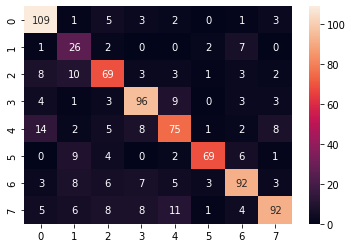

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions_linear_kernel))

acc = float(accuracy_score(y_test,scaled_predictions_linear_kernel))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions_linear_kernel)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

### Gaussian Kernel

              precision    recall  f1-score   support

       angry       0.89      0.90      0.90       124
        calm       0.40      0.84      0.54        38
     disgust       0.76      0.82      0.79        99
        fear       0.90      0.80      0.84       119
       happy       0.82      0.77      0.79       115
     neutral       1.00      0.76      0.86        91
         sad       0.86      0.79      0.82       127
   surprised       0.85      0.86      0.85       135

    accuracy                           0.82       848
   macro avg       0.81      0.82      0.80       848
weighted avg       0.84      0.82      0.82       848

----accuracy score 81.72169811320755 ----


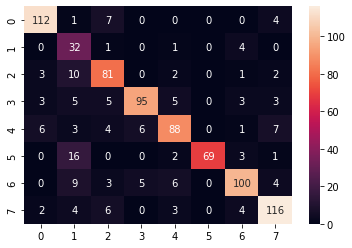

In [ ]:
print(classification_report(y_test,scaled_predictions_rbf_kernel))

acc = float(accuracy_score(y_test,scaled_predictions_rbf_kernel))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions_rbf_kernel)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()